#/media/dl/Windows8_OS/Documents \and \Settings/Jerome/Google \Drive/astro \lectures \in \jap/2016-A/Richmond

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
#plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#filename = 'kep_1066_a.txt'
#filename = 'planets.csv'

filename = 'hw_1_transit.txt'
#print(open(filename).read())
df=pd.read_csv(filename,delimiter='\t')
df.columns = ['t','f']
df.head()

,t,f
0,1215.693527,1.007360e+06
1,1215.700339,1.007585e+06
2,1215.707150,1.007355e+06
3,1215.713962,1.007186e+06
4,1215.720773,1.007472e+06


In [4]:
df.columns

Index(['t', 'f'], dtype='object')

# 1. Make a plot showing flux as a function of time.

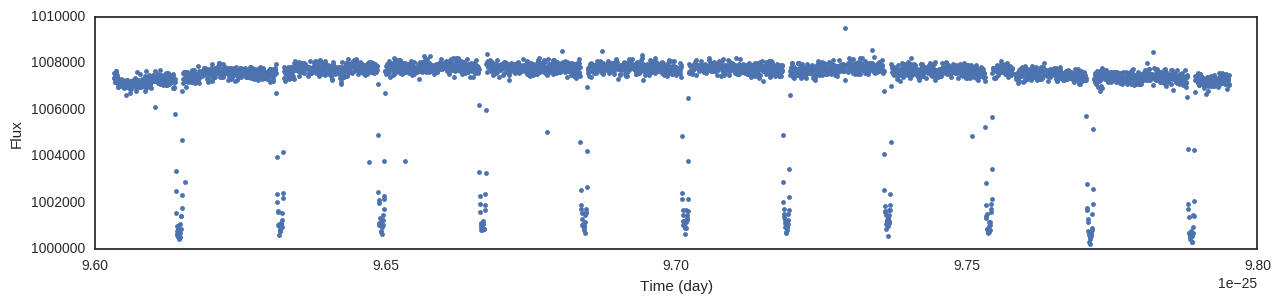

In [50]:
import seaborn as sb
with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,3))
    ax.plot(df.t, df.f,'.')
    ax.set_ylabel('Flux')
    ax.set_xlabel('Time (day)')

In [52]:
plt.savefig('lightcurve.png');

# 2. What is the period of variation? Explain your method.

Let's try to zoom in to estimate dip interval.

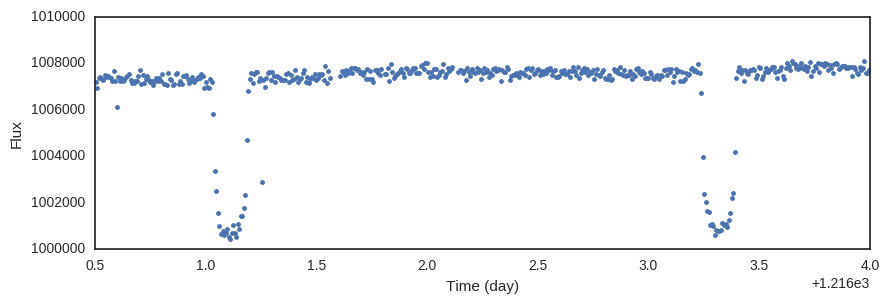

In [10]:
with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(10,3))
    ax.plot(df.t, df.f,'.')
    ax.set_ylabel('Flux')
    ax.set_xlabel('Time (day)')
    ax.set_xlim([1216.5,1220])

In [40]:
from scipy import signal
import matplotlib.pyplot as plt
#from scipy.fftpack import fft

x = df.t.values
y = df.f.values
P, Pxx_den = signal.periodogram(y, 0.002)

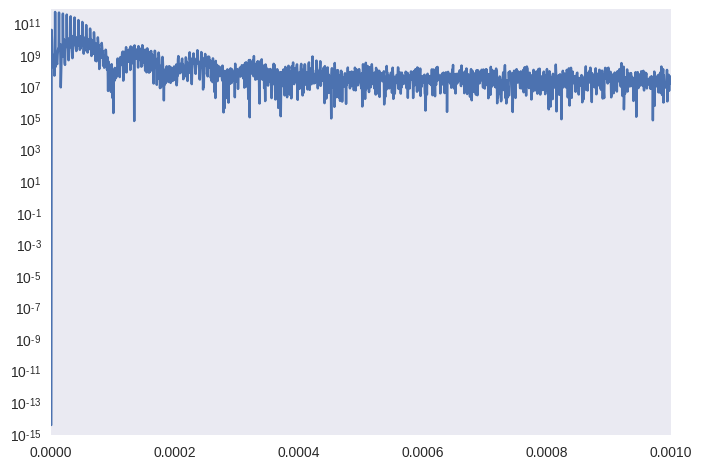

In [41]:
# plt.semilogy(P, Pxx_den)
# plt.grid()
# plt.show()

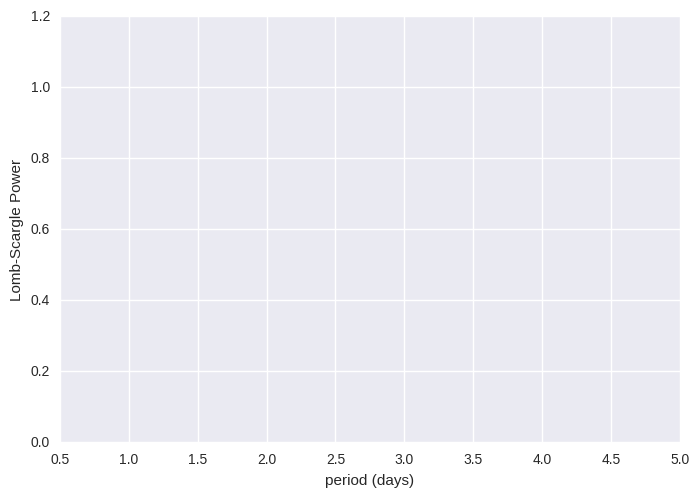

In [48]:
t = df.t.values
f/= np.median(df.f.values)

from gatspy.periodic import LombScargleFast
model = LombScargleFast().fit(t, f)
periods, power = model.periodogram_auto(nyquist_factor=100)

fig, ax = plt.subplots()
ax.plot(periods, power, 'k-')
ax.set(xlim=(0.5, 5), 
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power');

In [45]:
model.optimizer.period_range=(0.2, 1.4)
period = model.best_period
print("period = {0}".format(period))

ValueError: The optimizer is not designed to search for for periods larger than the data baseline. 

# 3. Make a phased light curve with your value for the period.